# PROYECTO SPRINT 13

In [709]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import math


In [710]:
# lee los datos  desde el archivo CSV
data = pd.read_csv('gym_churn_us.csv', sep=',')

# muestra su tamaño y las primeras 5 filas
data.head(5)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## 1. Análisis exploratorio de datos (EDA)

In [711]:
# muestra el tamaño, la información y tipos de datos
print(data.shape)
print(data.info())

(4000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-n

Tenemos 4000 registros, 14 categorías numéricas (enteros o decimales) y no hay valores ausentes en ninguna de ellas.

In [712]:
# Promedio y deviación estándar de cada categoría
data.describe().loc[['mean', 'std']]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521


In [713]:
# Valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron
data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### 1.1 Perfiles de usuarios

1. El perfil de usuario que normalmente permanece incrito es de 29 a 30 años, con contratos de periodos largos, aprovechan descuentos de inscripción con amigos o convenios con las empresas, en su mayoría viven o trabajan cerca del gimnasio, gastan en serivios adicionales del gimnasio y asisten constantemente a clases.

2. El perfil del usuario que se retirá es más joven, en promedio 26 años, con poco tiempo en el gimnasio desde la inscripción, contratos cortos y visitas menos frecuentes.


### 1.2 Análisis variales categoricas

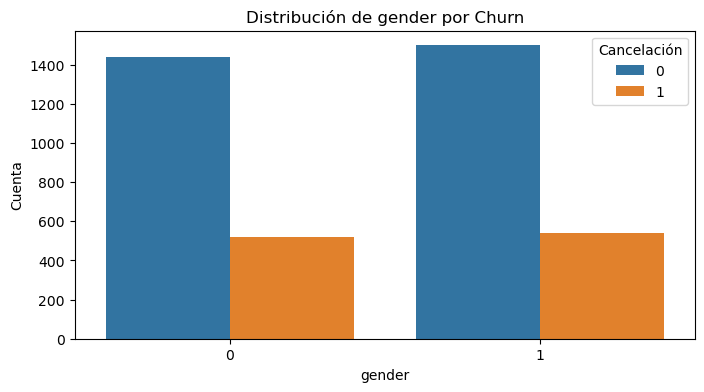

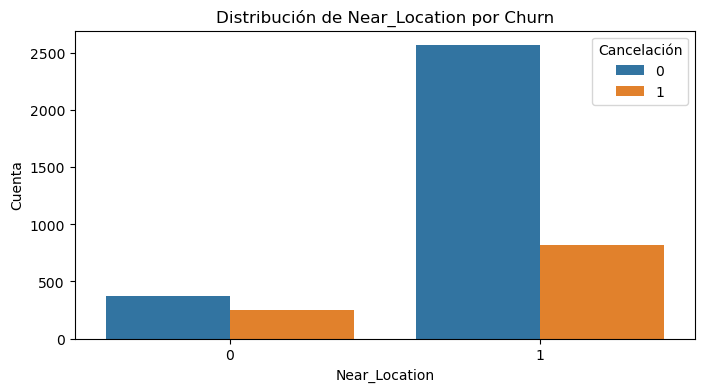

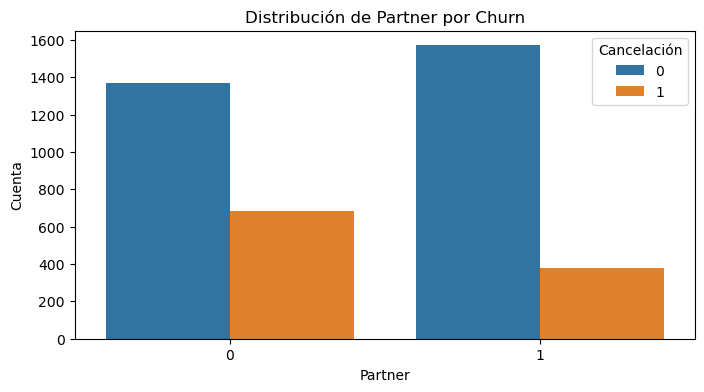

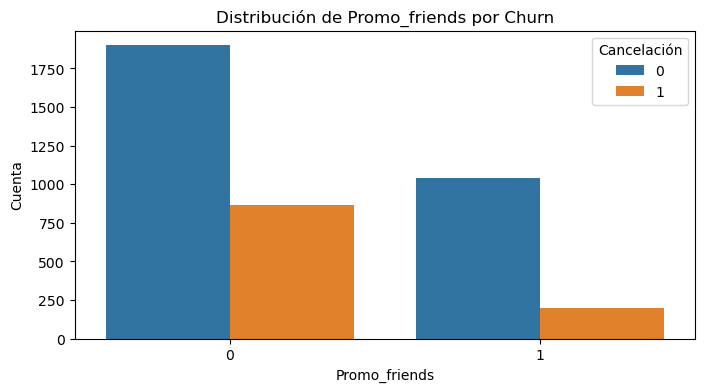

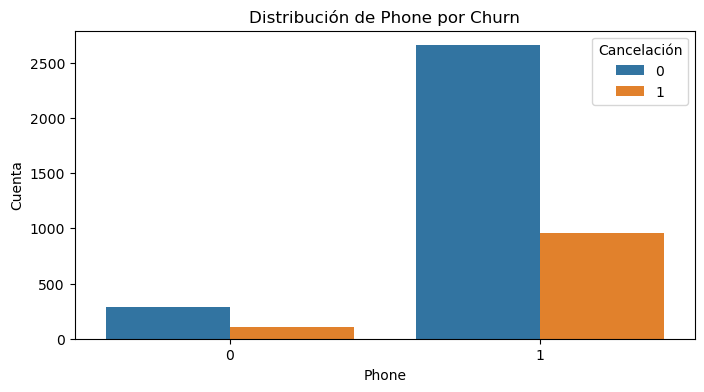

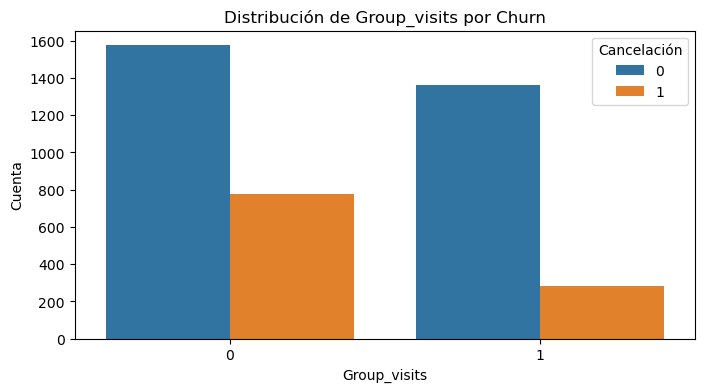

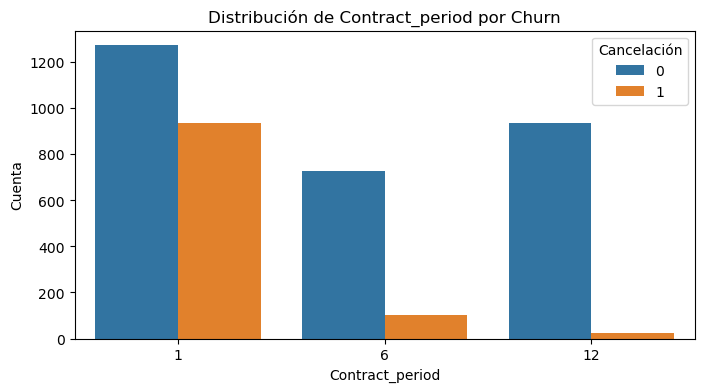

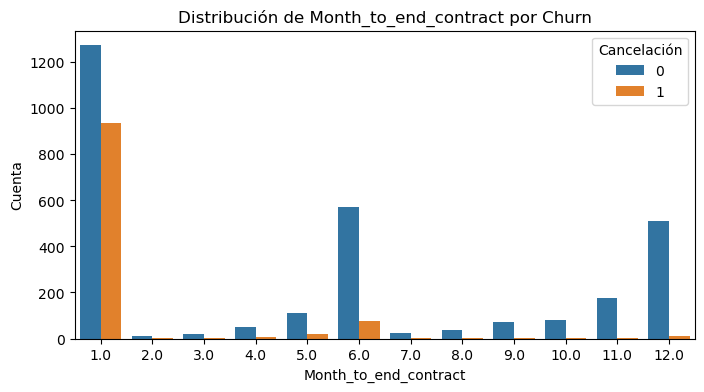

In [714]:
# Histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron

caracteristicas = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits', 
                   'Contract_period', 'Month_to_end_contract']

# Función para graficar las características
for col in caracteristicas:
    plt.figure(figsize=(8, 4))
    sns.countplot(data, x=col, hue='Churn')
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(f'{col}')
    plt.ylabel('Cuenta')
    plt.legend(title='Cancelación', loc='upper right')
    plt.show()

### 1.3 Análisis de variales continuas

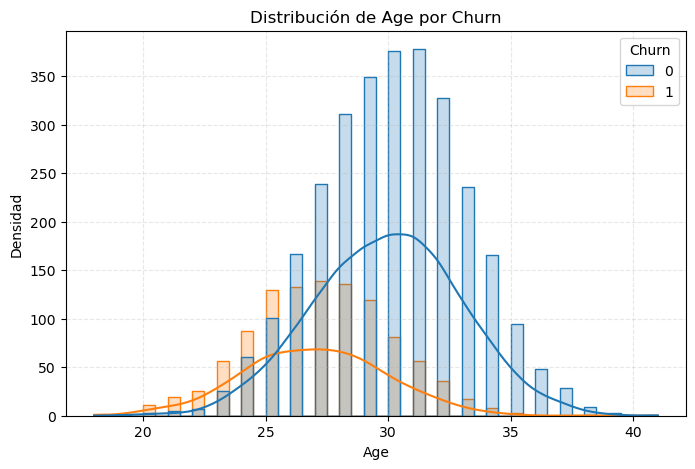

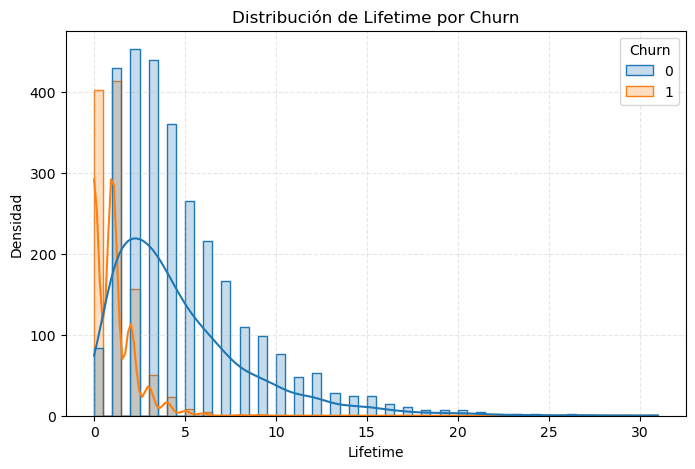

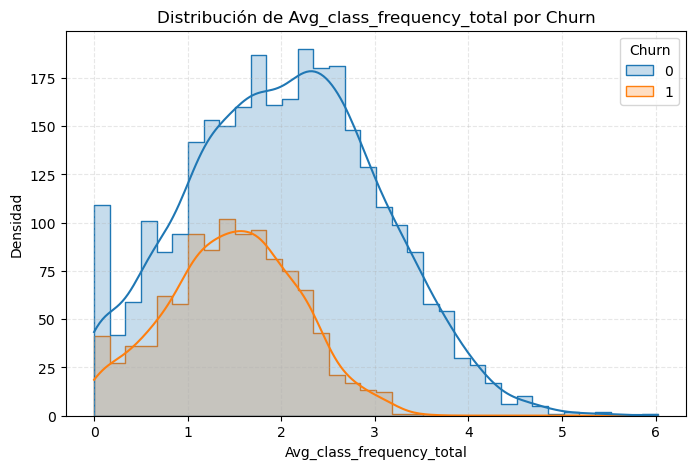

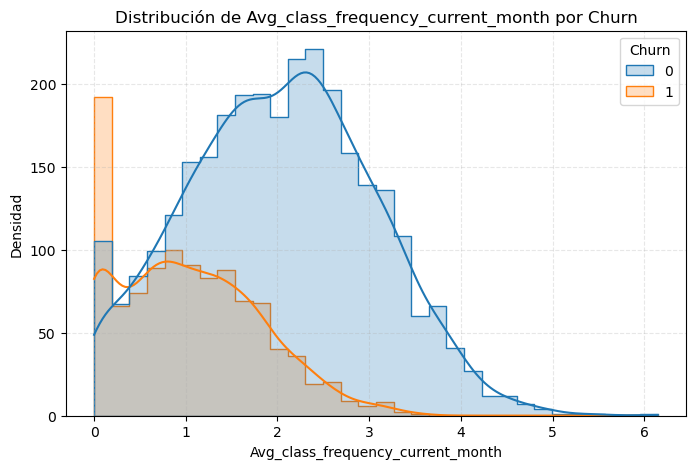

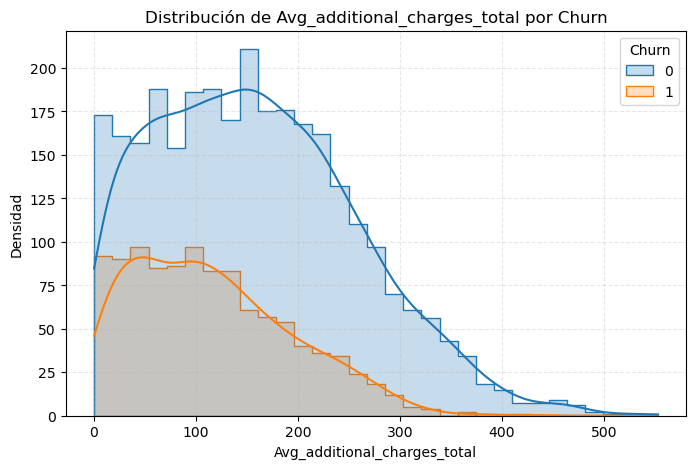

In [715]:
# Histogramas de barras y distribuciones de características para aquellas personas que se fueron (cancelación) y para las que se quedaron

caracteristicas = [ 'Age', 'Lifetime', 'Avg_class_frequency_total', 
    'Avg_class_frequency_current_month', 'Avg_additional_charges_total']

for col in caracteristicas:
    plt.figure(figsize=(8, 5))
    sns.histplot(data, x=col, hue='Churn', element='step', kde=True)
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(f'{col}')
    plt.ylabel('Densidad')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()

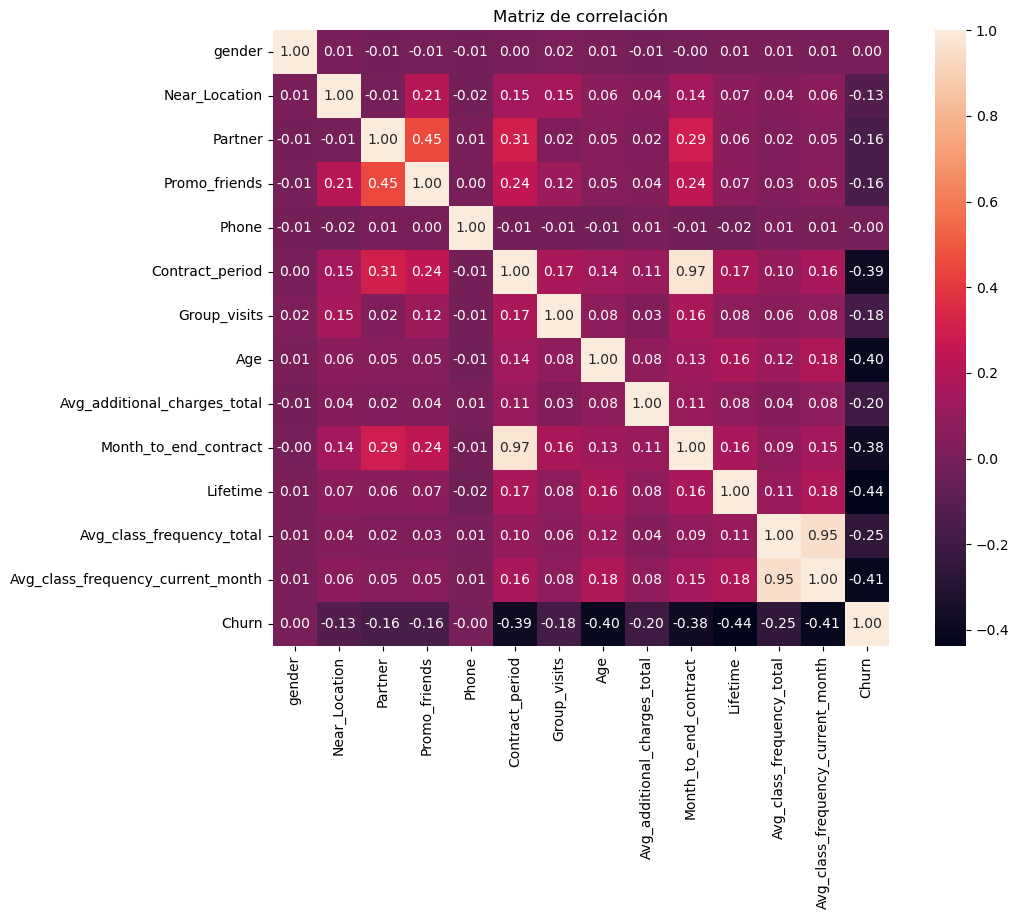

In [716]:
# Crea una matriz de correlación y muéstrala.

corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, square=True, fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

Las caracteristicas más fuertemente correlacionadas son el mes de terminación del contrato con el periodo del contrato y la frecuencia media de las visitas por semana y la frecuencia media de las visitas por mes. 

## 2. Construir un modelo para predecir la cancelación de usuarios

In [725]:
# Divide los datos en conjuntos de entrenamiento y validación

X = data.drop(columns=['Churn'])
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [726]:
# Estandarización de los datos
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) 
X_test_st = scaler.transform(X_test)

In [727]:
# Lista de modelos
models = [LogisticRegression(random_state=42), RandomForestClassifier(random_state=42)]


# Función que toma el modelo y los datos en las métricas input y output
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))

# Escribe un bucle que genere métricas según la lista de modelos
for i in models:
    print(f"Modelo: {type(i).__name__}")
    make_prediction(m=i,X_train = X_train_st, y_train= y_train,
                    X_test=X_test_st, y_test = y_test)
    print('---------------------------')



Modelo: LogisticRegression
Accuracy: 0.91
Precision: 0.86
Recall: 0.78
---------------------------
Modelo: RandomForestClassifier
Accuracy: 0.91
Precision: 0.86
Recall: 0.78
---------------------------


Aparentemento el mejor modelo en este caso es el de regresión logística, tiene mejor exactitud y precisión (menos falsos positivos). El recall para ambos modelos es igual.

## 3. Clústeres de usuarios/as

In [720]:
# Estandarización de los datos
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Mátriz de distancias
linked = linkage(X_sc, method = 'ward')
linked

array([[9.70000000e+01, 3.22200000e+03, 1.00990653e-01, 2.00000000e+00],
       [2.61000000e+02, 3.17900000e+03, 1.22634574e-01, 2.00000000e+00],
       [8.90000000e+02, 1.75000000e+03, 1.28123291e-01, 2.00000000e+00],
       ...,
       [7.98700000e+03, 7.99500000e+03, 8.38725499e+01, 2.65600000e+03],
       [7.98800000e+03, 7.99600000e+03, 8.89563592e+01, 3.03400000e+03],
       [7.99200000e+03, 7.99700000e+03, 1.04627601e+02, 4.00000000e+03]])

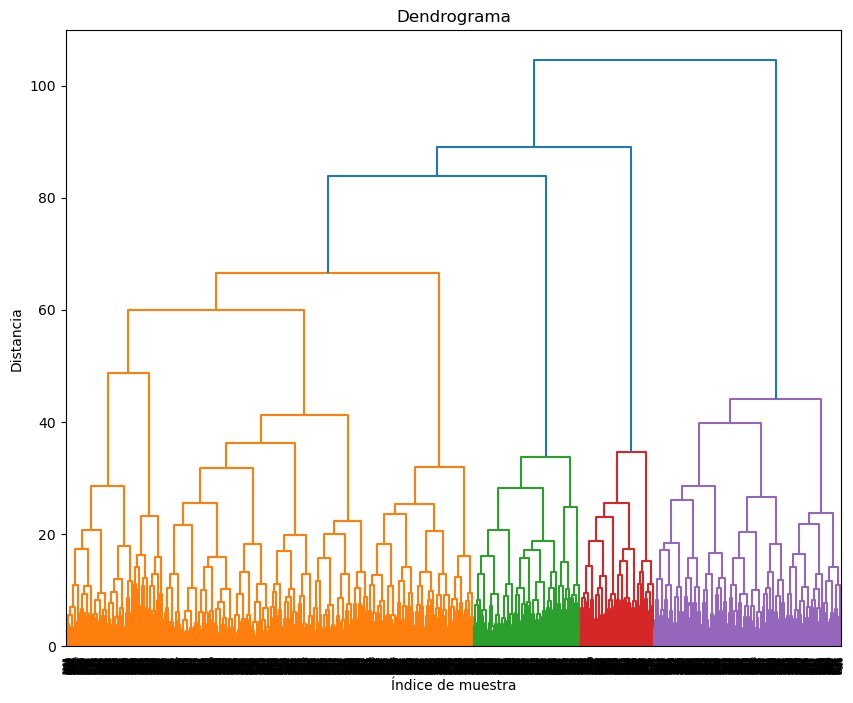

In [721]:
# Trazar un demograma para la mátriz de distancias
plt.figure(figsize=(10, 8))  
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')
plt.show()

El número óptimo de clústeres sugerido son (5) que corresponde a los cinco colores diferentes del demograma.

In [722]:
# Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes.

# define el modelo k_means con 5 clústeres
km = KMeans(n_clusters = 5, random_state=42)

# predice los clústeres para las observaciones
labels = km.fit_predict(X_sc)

# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
data['Cluster'] = labels

# obtiene las estadísticas de los valores medios de las características por clúster
data.groupby(['Cluster']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.484801,0.698363,0.301637,0.007015,0.899454,1.733437,0.255651,28.074825,127.131782,1.657833,2.089634,1.256531,0.991781,0.587685
1,0.494471,0.947867,0.791469,0.998420,0.906793,2.740916,0.431280,28.903633,139.456908,2.540284,3.529226,1.619489,1.488508,0.285940
2,0.464396,0.913313,0.766254,0.493808,0.925697,10.495356,0.506192,30.091331,164.190347,9.484520,4.693498,2.888801,2.886027,0.013932
3,0.547794,0.937500,0.742647,0.424632,0.863971,11.194853,0.575368,29.720588,167.670439,10.347426,4.818015,1.154578,1.139605,0.042279
4,0.568233,0.878076,0.178971,0.048098,0.914989,2.120805,0.456376,29.993289,155.602830,2.013423,4.844519,2.667290,2.650122,0.105145


Los grupos 2 y 3 tienen contratos de periodos largos y son quienes más gastan en servicios adicionales en el gimnasio.

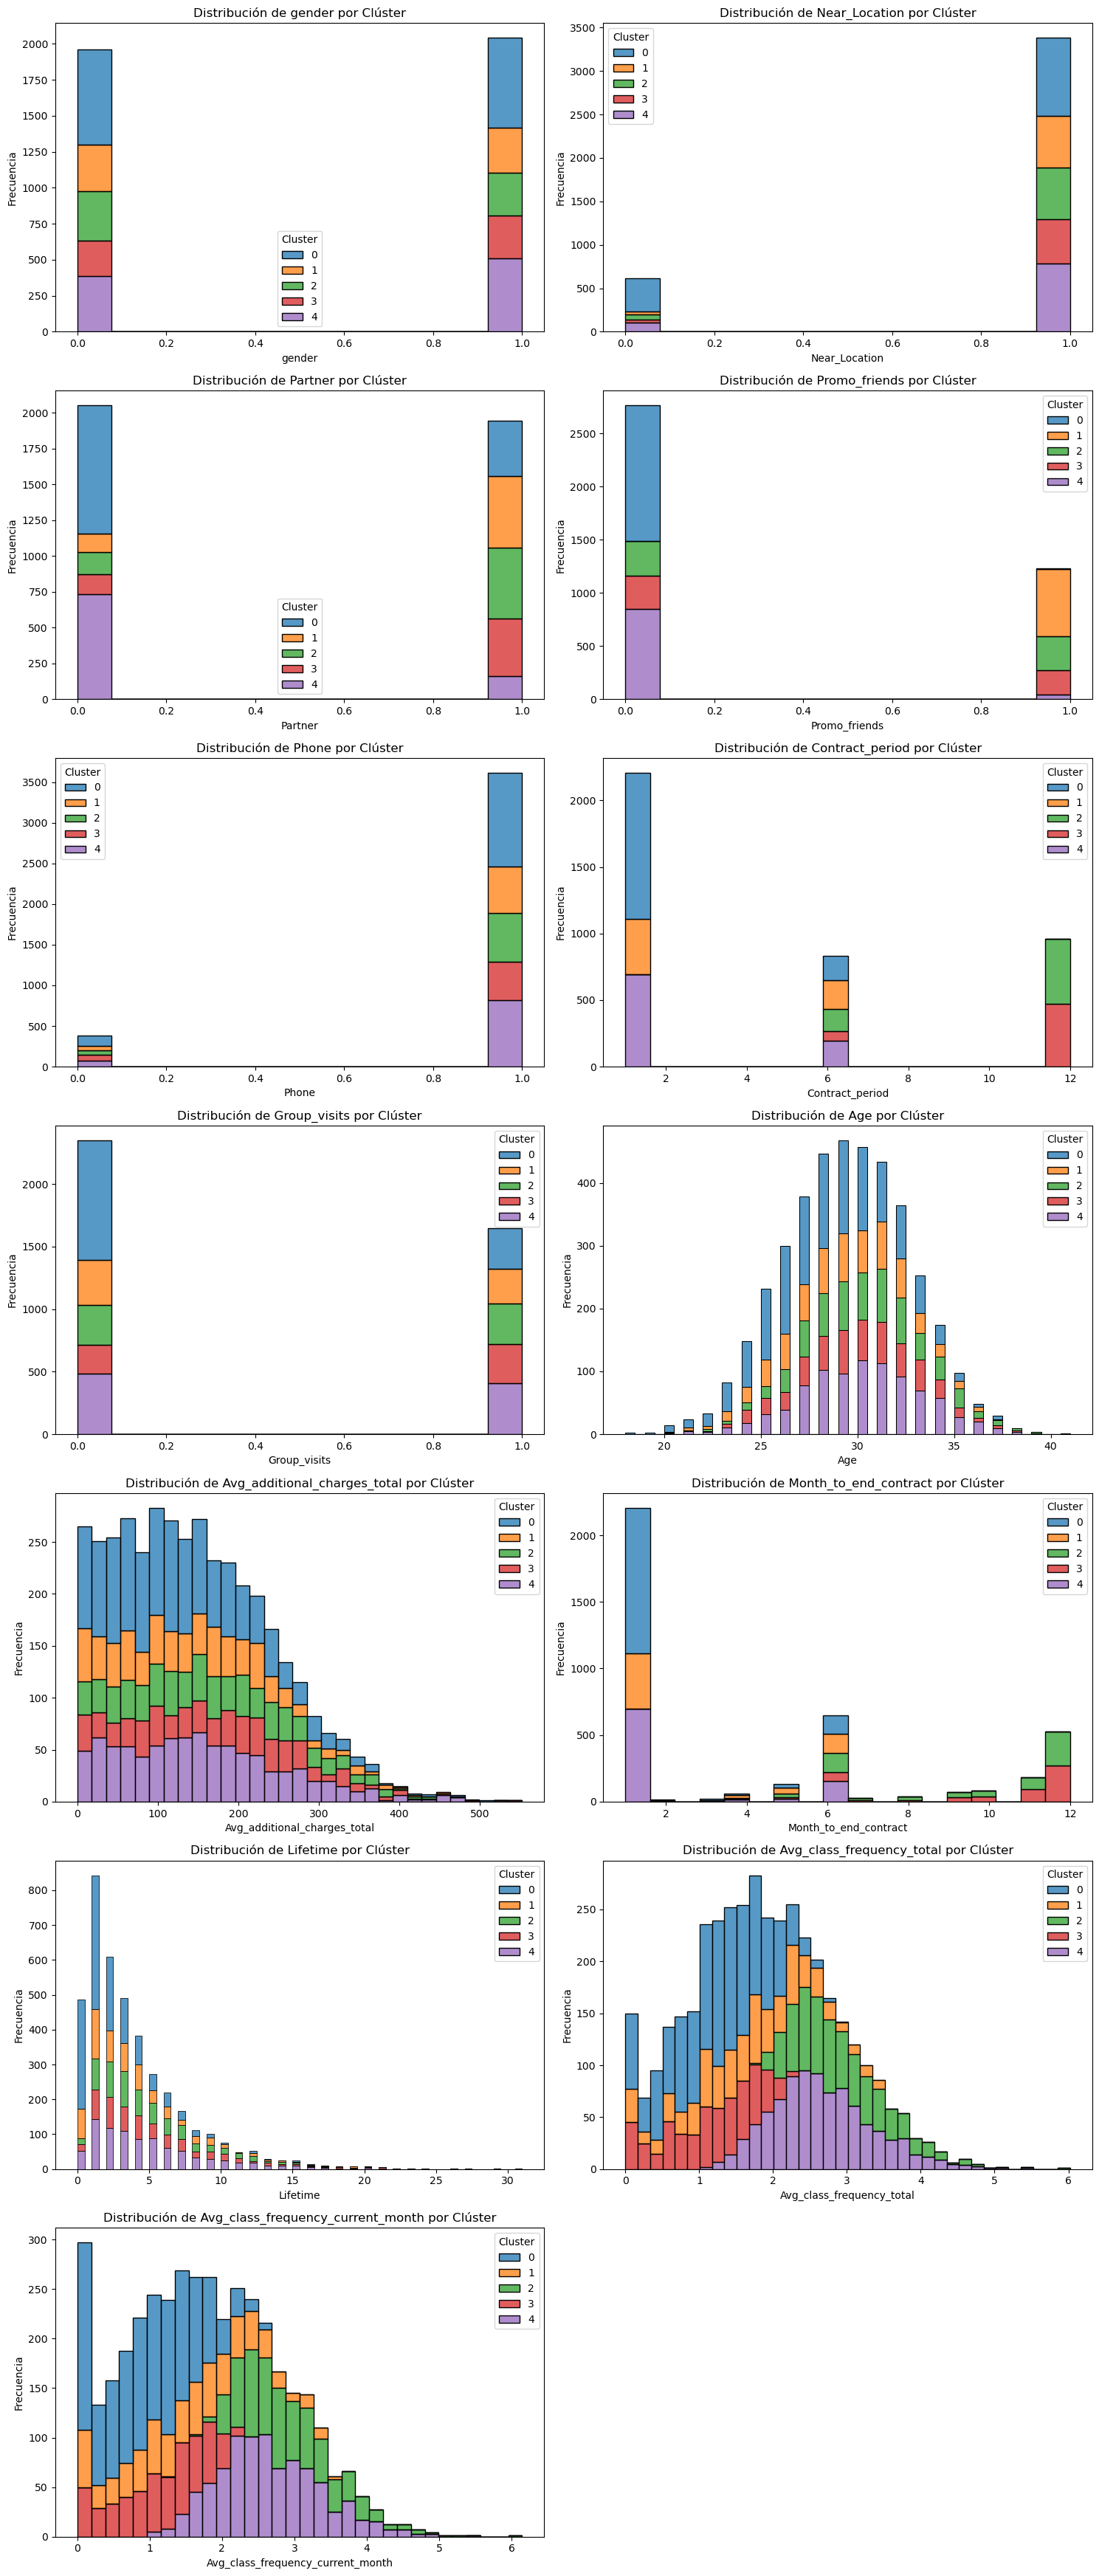

In [723]:
# Traza distribuciones de características para los clústeres.

caracteristicas = data.columns
caracteristicas = caracteristicas.drop(['Churn', 'Cluster'])

# Mostrar gráficas en cuadricula
num_vars = len(caracteristicas)
n_cols = 2  # número de columnas (gráficas por fila)
n_rows = math.ceil(num_vars / n_cols)  # número de filas (redondeado hacia arriba)


plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(caracteristicas):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=data, x=col, hue='Cluster', palette='tab10', multiple='stack')
    plt.title(f'Distribución de {col} por Clúster')
    plt.xlabel(f'{col}')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Observaciones:
1. La edad promedio de los usuarios de todos los grupos esta entre 29 y 30 años.
2. Los grupo 0, 1 y 4 son que tienen contratos más cortos y y próximos a terminar.
3. Grupo 0, tiene baja frecuencia en sus visitas.

In [724]:
# Agrupar por clúster y calcular la tasa media de cancelación
cancel_rates = ((data.groupby('Cluster')['Churn'].mean())*100).round(2)
print(cancel_rates.sort_values(ascending=False))

Cluster
0    58.77
1    28.59
4    10.51
3     4.23
2     1.39
Name: Churn, dtype: float64


Los grupos más propensos a irse son el 0 con 58,77% ,1 con 28,59% y 4 con 10,51% de tasas de cancelación.

Los grupos más leales son el 3 y 2 con tasa de cancelación por debajo del 5%

## 4. Recomensaciones a implementar


1. Los grupos más propensos a cancelar son aquellos que adquieren contratos cortos por lo cual se podría pensar en ofrecer contratos a largo plazo con descuentos, un ejemplo sería: paga 10 meses de inscripción y obten 12 meses.
2. El momento realmente decisivo es cuando el contrato esta a punto de terminar y es donde el usuario se pregunta ¿Que tanto he venido al gimnasio?  ¿Justifica pagar otro mes? ¿Logré lo que quería?. Aquí es donde podríamos tener la posibilidad de ofrecer cupones promocionales de renovación con amigos, convenios con empresas, fechas especiales como amor y amistad, día de la Madre, cumpleaños, etc, que ayuden al usuario a tomar una decisión de permanecer en la membresía.
3. Las visitas frecuentes de los usuarios, son evidencia del deseo por permanecer inscrito, por lo cual la motivación que se le de a los usuarios para asistir es fundamental para sigan siendo usuarios activos. La motivación podría darse con variedad de clases y servicios como un valor agregado dentro de su membresía. Un ejemplo sería ofrecer 3 clases de menbresía así:
    * Básica (más económica) en donde los usuarios tengan ingreso a todas las máquinas pero sin clases grupales.
    * Intermedia (un poco más costosa que la básica): Ingreso a todas las máquinas más ingreso a todas las clases grupales 
    * Premium (un poco más costosa que la intermedia): acceso a todo lo de la intermedia más el acompañamiento de profesionales en la parte deportiva, sicología y nutrición que permitan realizar cambio y mantenimineto de hábitos que logren mantener una relación a largo plazo entre el gimnasio y el usuario.